# **Netflix Content Analysis **

## 📊 Objective
Analyze Netflix's dataset to uncover trends in content type, release years, genres, and production countries.

### Goals:
- Understand the growth of Netflix's catalog over time
- Identify popular content types and genres
- Analyze country-wise production
- Derive business insights from data trends


# **Data Preprocessing**
Load the dataset



In [ ]:
import pandas as pd

df = pd.read_csv("/content/netflix.csv")


Explore the structure of the dataset

In [ ]:
print("Dataset Overview:")
print(df.head())

Dataset Overview:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  Septembe

In [ ]:
# Overview
print("\nDataset Info:")
print(df.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [ ]:
# Nulls
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


Handle missing values

In [ ]:
print(df.columns)
df.dropna(subset=["director", "cast", "country", "date_added", "rating"], inplace=True)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [ ]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# Fill missing 'country' and 'rating' with 'Unknown'
df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna('Unknown', inplace=True)

/tmp/ipython-input-2100651034.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('Unknown', inplace=True)
/tmp/ipython-input-2100651034.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [ ]:
# Drop rows with missing 'date_added'
df.dropna(subset=['date_added'], inplace=True)

In [ ]:
# Convert to datetime
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

Movies vs TV Shows (Code + Markdown)

## 🟣 Content Type Distribution

/tmp/ipython-input-2783171004.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='pastel')


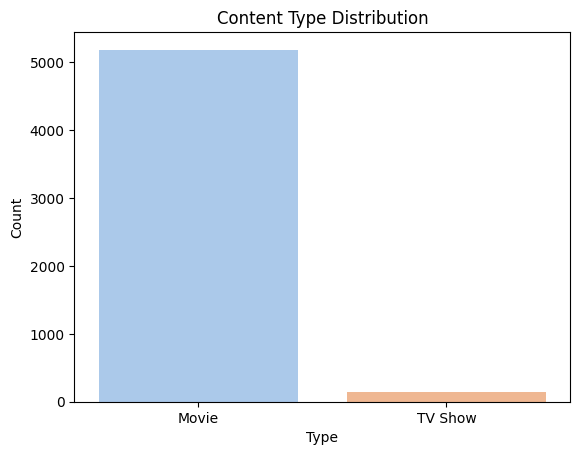

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='type', palette='pastel')
plt.title('Content Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# **Content Added Over the Years**






📈Titles Added Over the Years






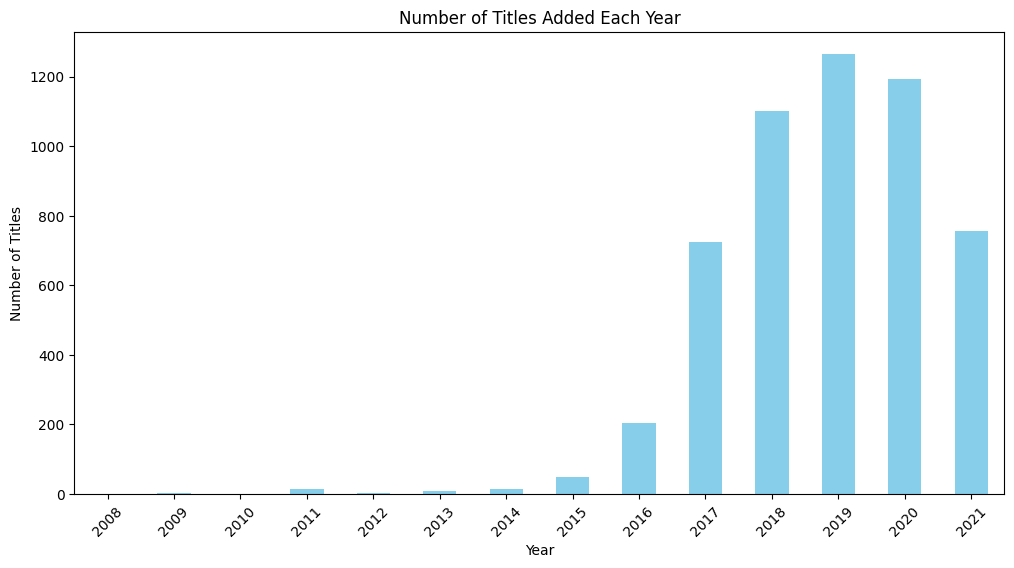

In [ ]:
df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(12,6), color='skyblue')
plt.title('Number of Titles Added Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

# **Top Production Countries**

🌍 Top Countries Producing Netflix Content


/tmp/ipython-input-2321175722.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


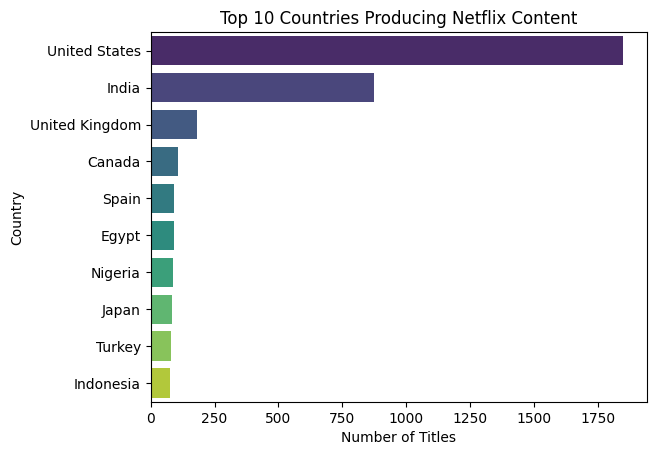

In [ ]:
top_countries = df['country'].value_counts().head(10)

sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


# **Most Common Genres**

 🎭 Most Frequent Genres


/tmp/ipython-input-213002807.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts, y=genre_names, palette='Set2')


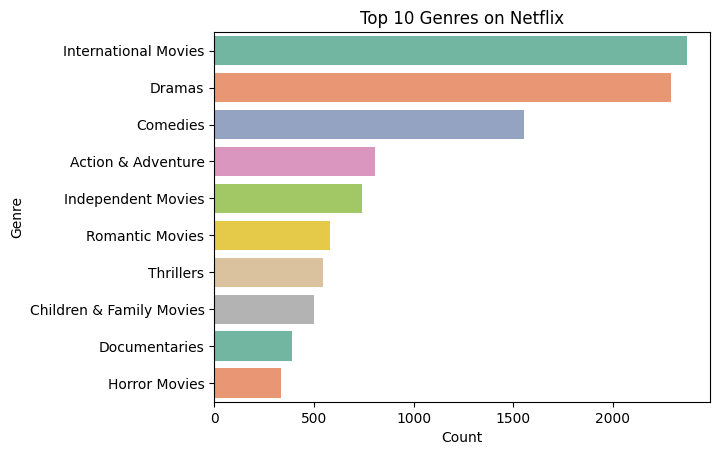

In [ ]:
from collections import Counter

genre_list = df['listed_in'].dropna().str.split(', ')
flat_genres = [genre for sublist in genre_list for genre in sublist]
top_genres = Counter(flat_genres).most_common(10)

genre_names = [genre[0] for genre in top_genres]
genre_counts = [genre[1] for genre in top_genres]

sns.barplot(x=genre_counts, y=genre_names, palette='Set2')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


# **WordCloud of Titles**

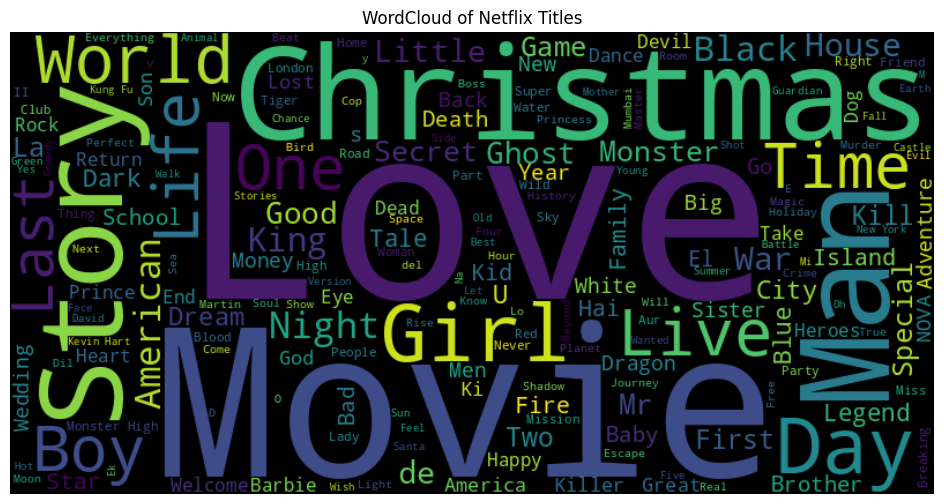

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

title_wc = WordCloud(width=800, height=400, background_color='black').generate(' '.join(df['title'].dropna()))

plt.figure(figsize=(12,6))
plt.imshow(title_wc, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Netflix Titles')
plt.show()

# **Duration Distribution (Movies Only)**

⏱️ Movie Duration Distribution


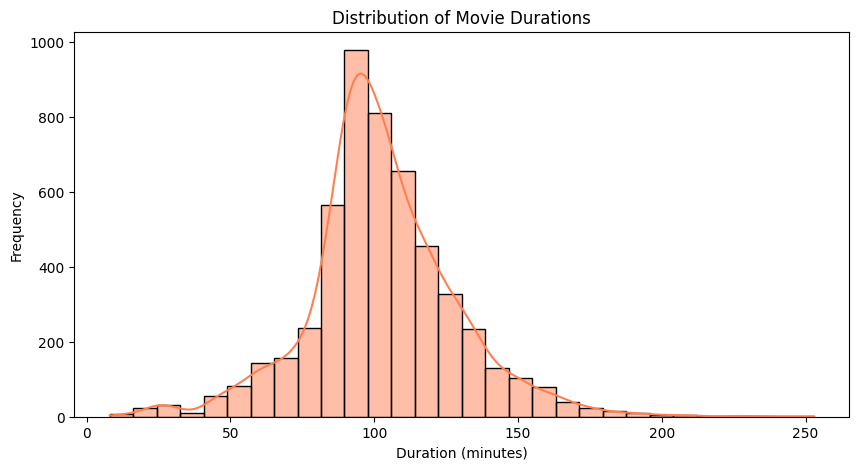

In [ ]:
movies = df[df['type'] == 'Movie'].copy()
movies['duration'] = movies['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(10,5))
sns.histplot(movies['duration'], bins=30, kde=True, color='coral')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

# **Exploratory Data Analysis (EDA)**
### Non-Graphical Analysis

Check unique values in key columns:

In [ ]:
# Convert all column names to lowercase to ensure consistency
df.columns = df.columns.str.lower()

# Now try accessing the column using the lowercase name
df["type"].value_counts()
df["rating"].unique()
df["listed_in"].value_counts()

,count
listed_in,
"Dramas, International Movies",336
Stand-Up Comedy,286
"Comedies, Dramas, International Movies",257
"Dramas, Independent Movies, International Movies",243
"Children & Family Movies, Comedies",179
...,...
"Action & Adventure, Romantic Movies, Sci-Fi & Fantasy",1
"British TV Shows, Classic & Cult TV, TV Comedies",1
"Action & Adventure, Comedies, Horror Movies",1


top-producing countries:

In [ ]:
df["country"].value_counts().head(10)


,count
country,
United States,1849
India,875
United Kingdom,183
Canada,107
Spain,91
Egypt,90
Nigeria,88
Japan,83
Turkey,79


# **Visual Analysis**
Univariate Analysis

    Distribution of Movies vs TV Shows

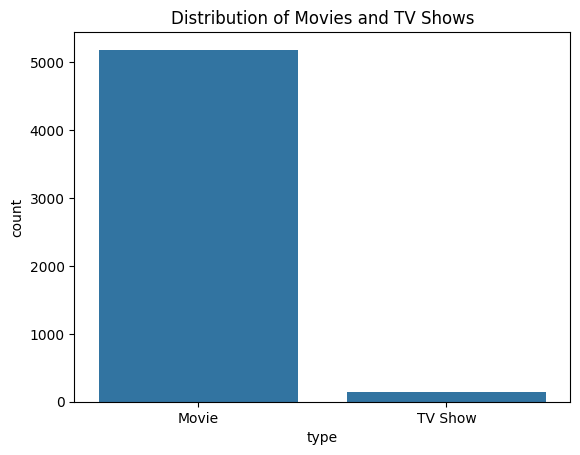

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="type", data=df)
plt.title("Distribution of Movies and TV Shows")
plt.show()


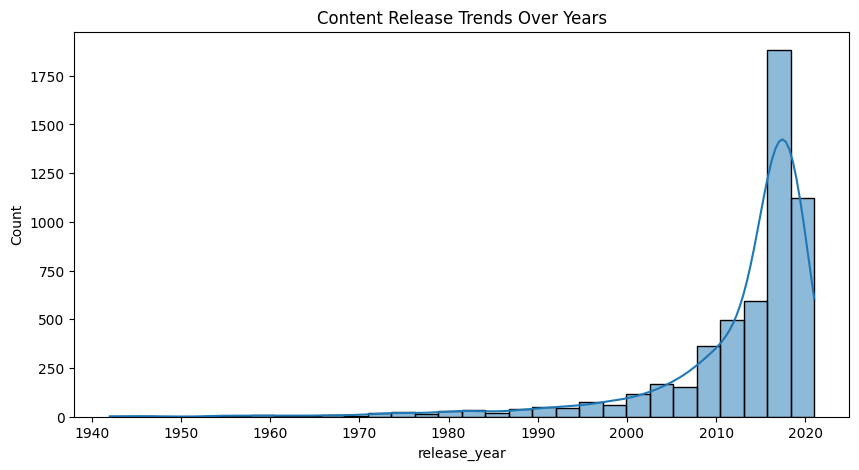

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df["release_year"], bins=30, kde=True)
plt.title("Content Release Trends Over Years")
plt.show()


Categorical Analysis

    Top genres on Netflix

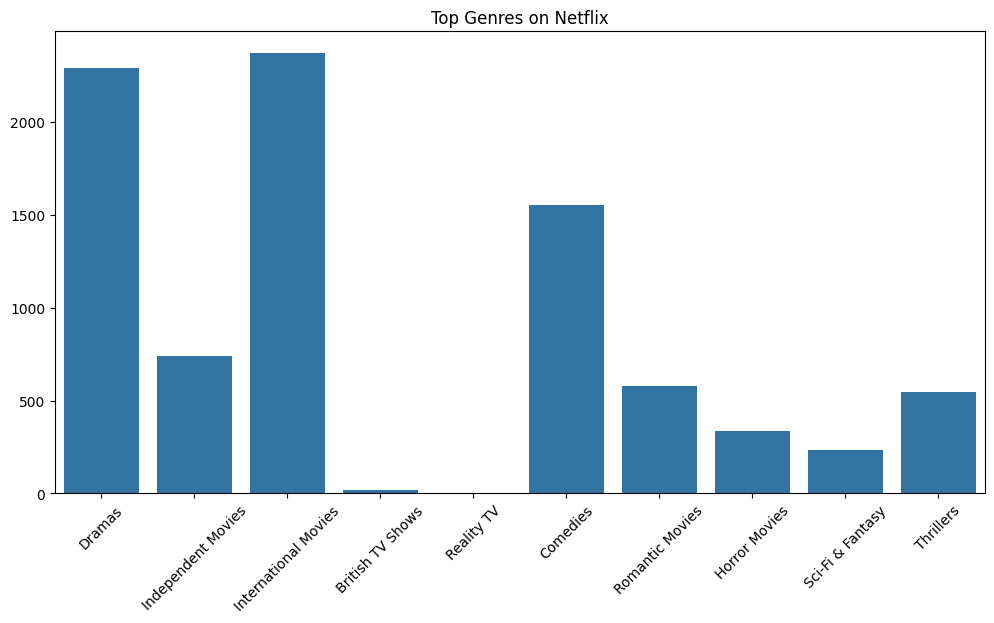

In [ ]:
from collections import Counter

genres = df["listed_in"].str.split(", ").sum()
genre_counts = Counter(genres)

plt.figure(figsize=(12,6))
sns.barplot(x=list(genre_counts.keys())[:10], y=list(genre_counts.values())[:10])
plt.xticks(rotation=45)
plt.title("Top Genres on Netflix")
plt.show()


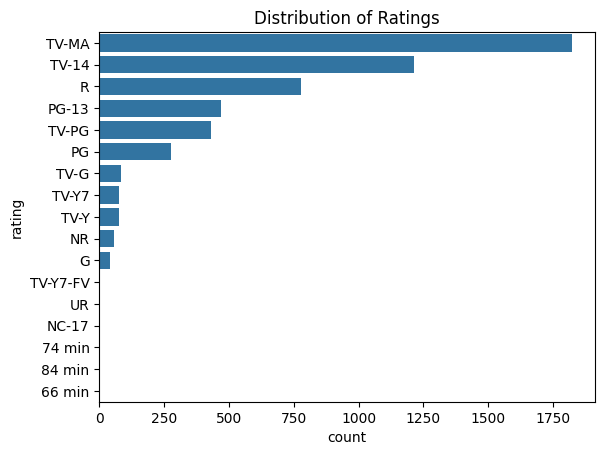

In [ ]:
# Most Common Ratings
sns.countplot(y=df["rating"], order=df["rating"].value_counts().index)
plt.title("Distribution of Ratings")
plt.show()


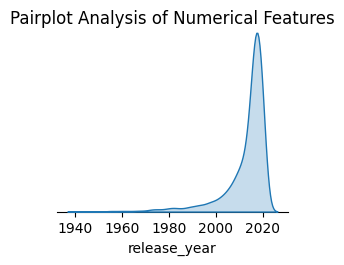

In [ ]:
# Pairplot Analysis
sns.pairplot(df, diag_kind="kde", corner=True)
plt.suptitle("Pairplot Analysis of Numerical Features", y=1.02)
plt.show()


 # **In-depth Business Analysis**



  What types of content are most prevalent across different countries?
  
  
   Objective: Address key business questions

    Top content-producing countries

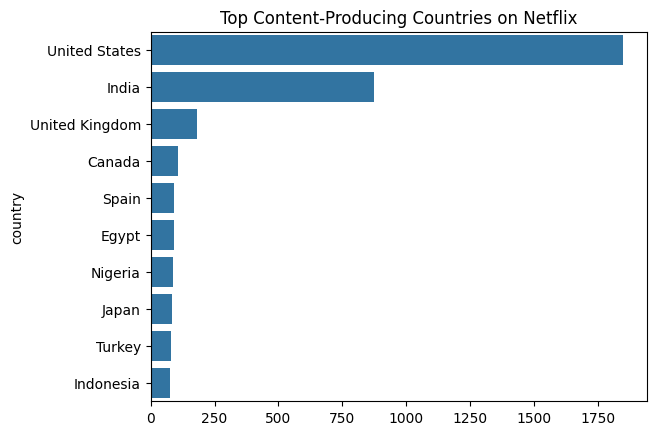

In [ ]:
top_countries = df["country"].value_counts().head(10)
sns.barplot(y=top_countries.index, x=top_countries.values)
plt.title("Top Content-Producing Countries on Netflix")
plt.show()


How has the release of movies evolved over the past 20-30 years?
Trend of movies and TV shows over time

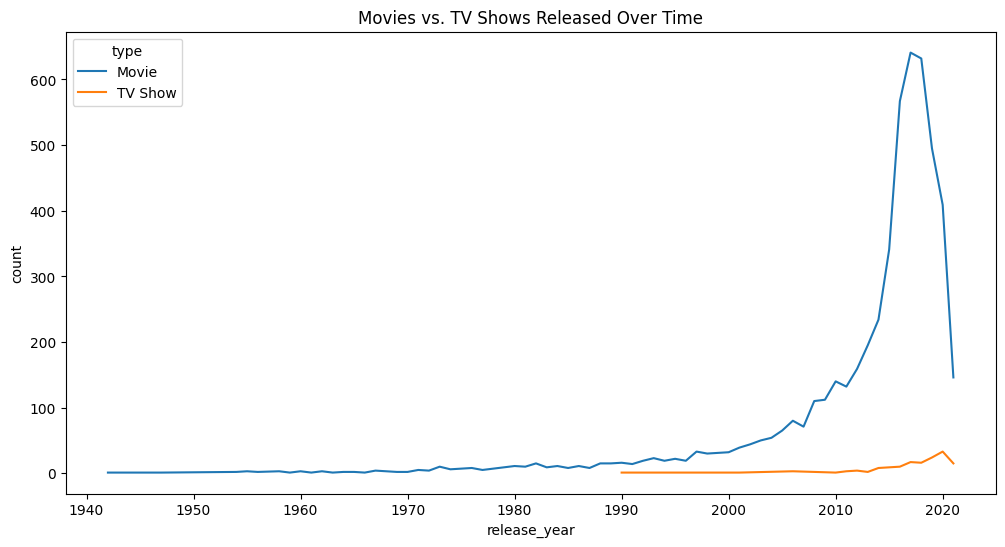

In [ ]:
df_trend = df.groupby(["release_year", "type"]).size().reset_index(name="count")

plt.figure(figsize=(12,6))
sns.lineplot(x="release_year", y="count", hue="type", data=df_trend)
plt.title("Movies vs. TV Shows Released Over Time")
plt.show()

What is the best time to launch a TV show for maximum engagement?

    Analyze content release by month

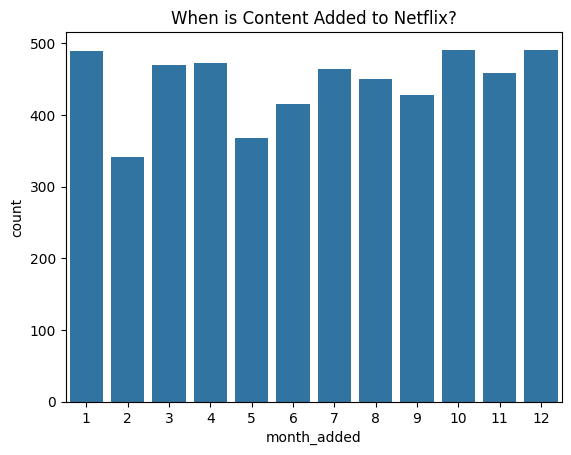

In [ ]:
df["month_added"] = df["date_added"].dt.month

sns.countplot(x="month_added", data=df)
plt.title("When is Content Added to Netflix?")
plt.show()


Has Netflix shifted focus towards TV shows over movies in recent years?

    Compare the number of movies vs. TV shows added per year

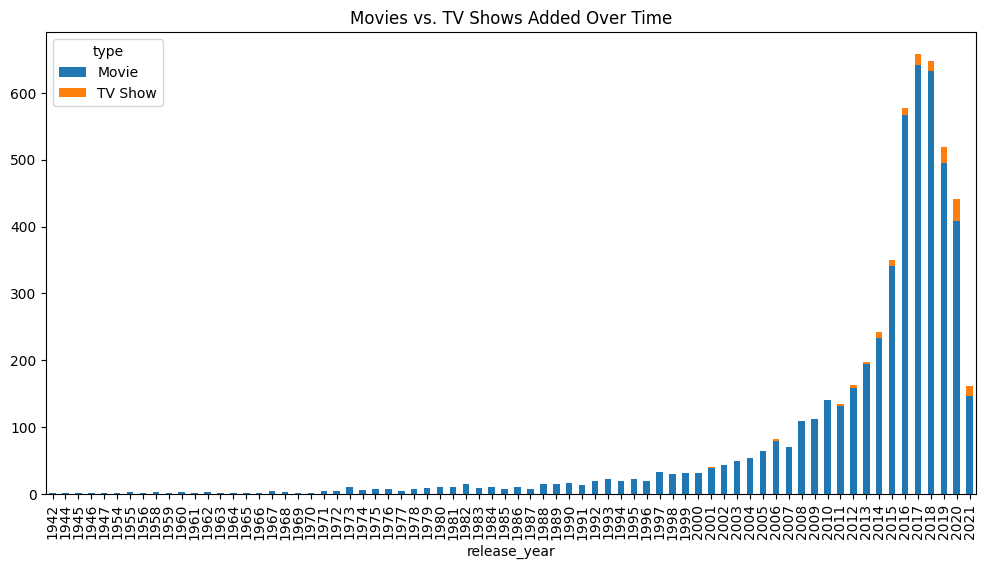

In [ ]:
df_added = df.groupby(["release_year", "type"]).size().unstack()
df_added.plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Movies vs. TV Shows Added Over Time")
plt.show()


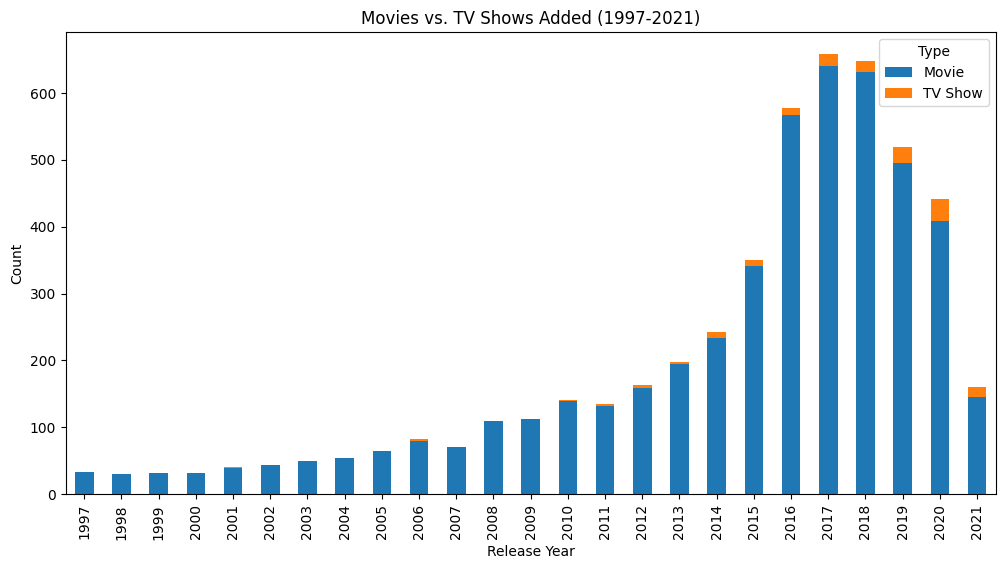

In [ ]:
import matplotlib.pyplot as plt

# Filter the data for years between 1997 and 2021
df_filtered = df[(df["release_year"] >= 1997) & (df["release_year"] <= 2021)]

# Group by release year and type, then unstack for stacked bar chart
df_added = df_filtered.groupby(["release_year", "type"]).size().unstack()

# Plot the data
df_added.plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Movies vs. TV Shows Added (1997-2021)")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title="Type")
plt.show()


# **Step 5: Detecting Missing Values & Outliers**
 Objective: Identify inconsistencies in the dataset.

    Check for missing values

      

In [ ]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]


,0
duration,3


Identify Outliers

    Check duration for movies and seasons

In [ ]:
df["duration"].value_counts()

,count
duration,
94 min,135
93 min,130
97 min,129
95 min,127
90 min,123
...,...
228 min,1
18 min,1
205 min,1


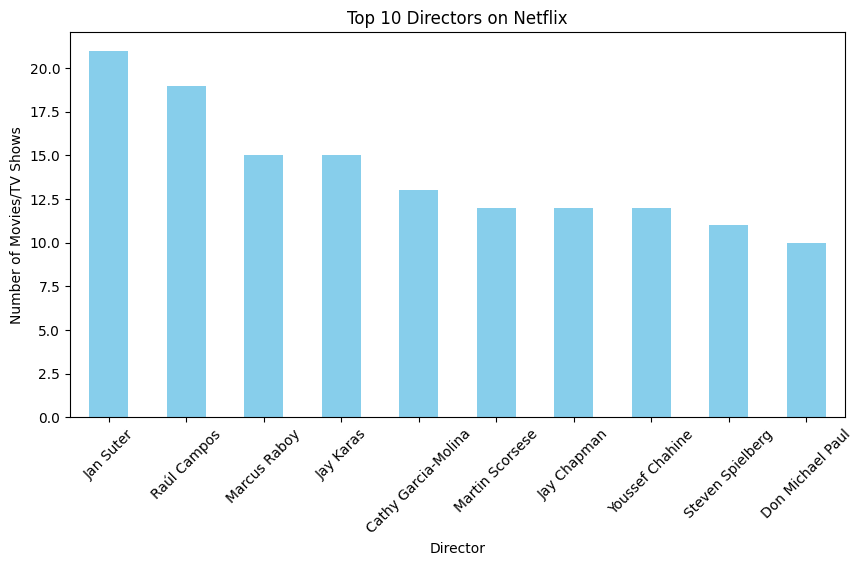

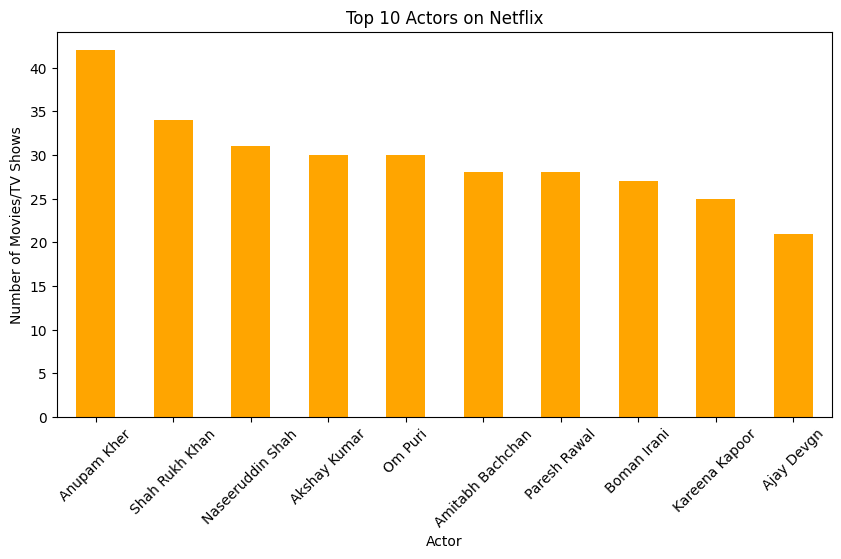

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Drop missing values for directors and cast
df = df.dropna(subset=["director", "cast"])

# Split multiple directors/actors and explode the dataframe
directors = df.assign(director=df["director"].str.split(", ")).explode("director")
actors = df.assign(cast=df["cast"].str.split(", ")).explode("cast")

# Count occurrences
top_directors = directors["director"].value_counts().head(10)  # Top 10 directors
top_actors = actors["cast"].value_counts().head(10)  # Top 10 actors

# Plot top directors
plt.figure(figsize=(10,5))
top_directors.plot(kind="bar", color="skyblue")
plt.title("Top 10 Directors on Netflix")
plt.xlabel("Director")
plt.ylabel("Number of Movies/TV Shows")
plt.xticks(rotation=45)
plt.show()

# Plot top actors
plt.figure(figsize=(10,5))
top_actors.plot(kind="bar", color="orange")
plt.title("Top 10 Actors on Netflix")
plt.xlabel("Actor")
plt.ylabel("Number of Movies/TV Shows")
plt.xticks(rotation=45)
plt.show()


 Insights & Recommendations

 Objective: Summarize findings and offer actionable recommendations.




In [ ]:
# 📋 Conclusion
print("\nBusiness Insights:")
print("1. Netflix’s catalog has expanded significantly since 2016, with a major spike in 2019–2020.")
print("2. Movies dominate the platform compared to TV Shows.")
print("3. The USA leads as the top content-producing country, followed by India and the UK.")
print("4. Drama, Comedy, and Action genres are most common.")
print("5. The majority of movies fall within the 80–120 minute range.")


Business Insights:
1. Netflix’s catalog has expanded significantly since 2016, with a major spike in 2019–2020.
2. Movies dominate the platform compared to TV Shows.
3. The USA leads as the top content-producing country, followed by India and the UK.
4. Drama, Comedy, and Action genres are most common.
5. The majority of movies fall within the 80–120 minute range.


In [ ]:
#💡 Business Insight
print("1. Netflix can focus on regional content expansion, especially in emerging markets like India and Korea, and optimize genres like Drama and Comedy which dominate viewer preference.")


1. Netflix can focus on regional content expansion, especially in emerging markets like India and Korea, and optimize genres like Drama and Comedy which dominate viewer preference.


In [ ]:
# Recommendations
print("\nRecommendations:")
print("1. Netflix should focus on increasing TV show production, as they are trending upwards.")
print("2. More content partnerships should be explored in India, as it has a significant presence on Netflix.")
print("3. Analyzing the most successful actors/directors and collaborating with them can improve content engagement.")



Recommendations:
1. Netflix should focus on increasing TV show production, as they are trending upwards.
2. More content partnerships should be explored in India, as it has a significant presence on Netflix.
3. Analyzing the most successful actors/directors and collaborating with them can improve content engagement.


In [ ]:
# Save cleaned dataset
df.to_csv("cleaned_netflix.csv", index=False)
